
--- Выполнение заданий для n = 100 ---
Опорные точки (центры интервалов и плотности):
x: 37.52, y: 0.00681
x: 112.46, y: 0.00387
x: 187.40, y: 0.00120
x: 262.34, y: 0.00080
x: 337.28, y: 0.00040
x: 412.23, y: 0.00013
x: 487.17, y: 0.00000
x: 562.11, y: 0.00000
x: 637.05, y: 0.00000
x: 711.99, y: 0.00013
Коэффициенты линейной регрессии: b0 = -5.36723, b1 = -0.00618


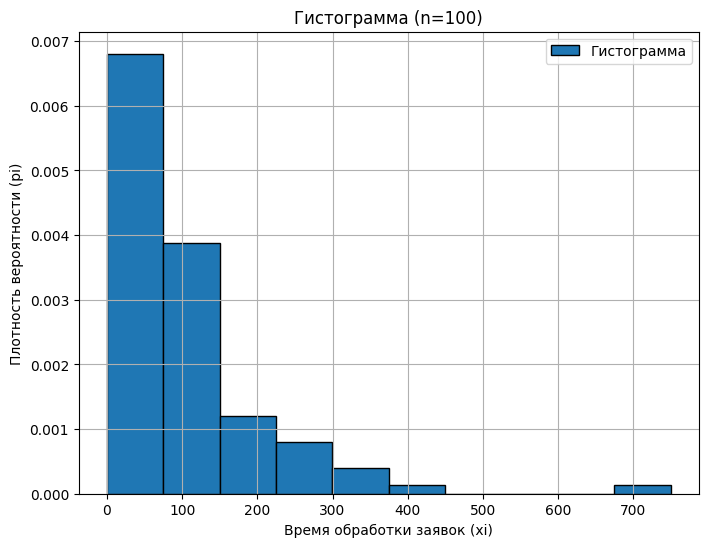

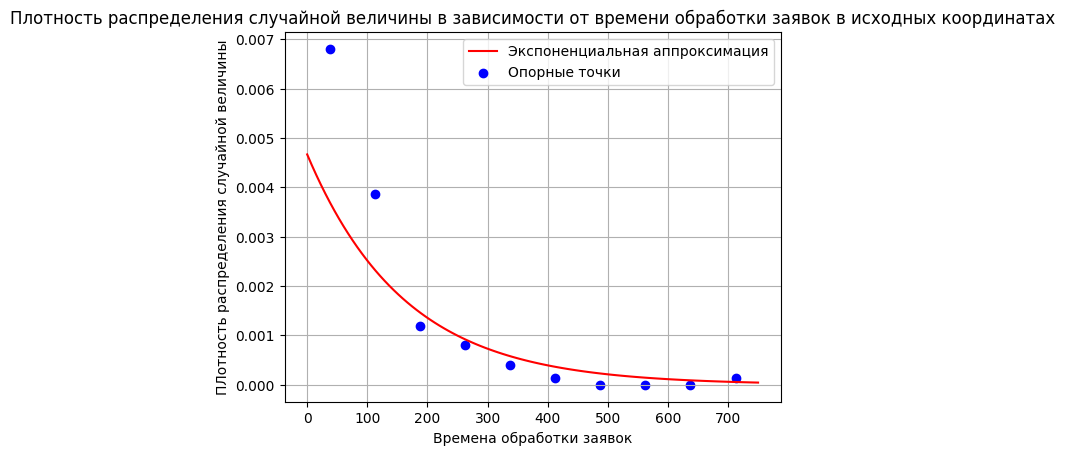

Погрешность коэффициента интенсивности: 38.20%

--- Выполнение заданий для n = 300 ---
Опорные точки (центры интервалов и плотности):
x: 35.05, y: 0.00749
x: 104.45, y: 0.00355
x: 173.85, y: 0.00149
x: 243.26, y: 0.00091
x: 312.66, y: 0.00043
x: 382.06, y: 0.00029
x: 451.47, y: 0.00010
x: 520.87, y: 0.00010
x: 590.27, y: 0.00000
x: 659.68, y: 0.00005
Коэффициенты линейной регрессии: b0 = -4.98545, b1 = -0.00800


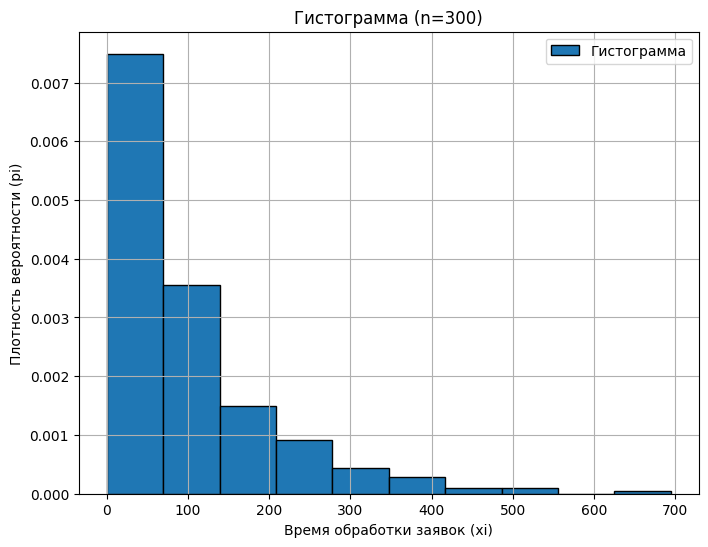

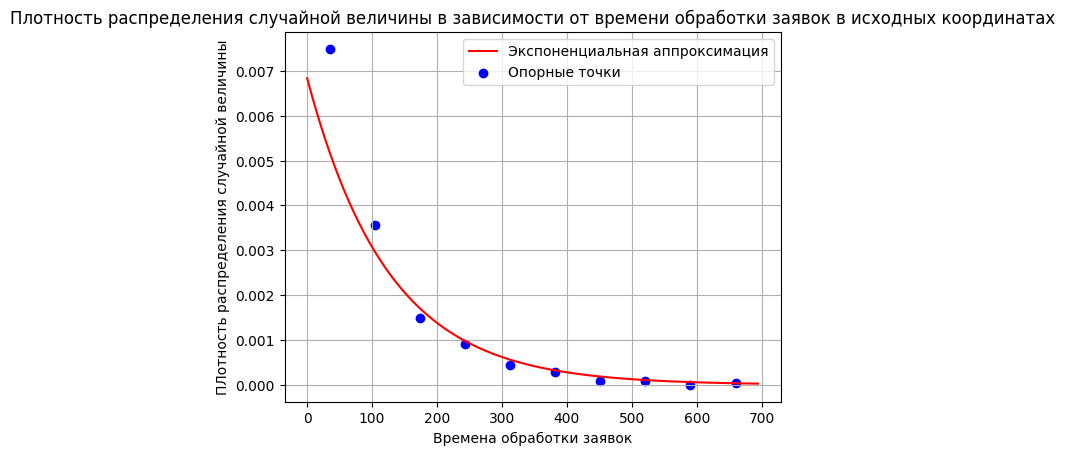

Погрешность коэффициента интенсивности: 20.02%

--- Выполнение заданий для n = 500 ---
Опорные точки (центры интервалов и плотности):
x: 32.54, y: 0.00730
x: 97.49, y: 0.00422
x: 162.44, y: 0.00185
x: 227.39, y: 0.00099
x: 292.34, y: 0.00040
x: 357.29, y: 0.00034
x: 422.24, y: 0.00022
x: 487.19, y: 0.00006
x: 552.14, y: 0.00000
x: 617.09, y: 0.00003
Коэффициенты линейной регрессии: b0 = -4.71689, b1 = -0.00938


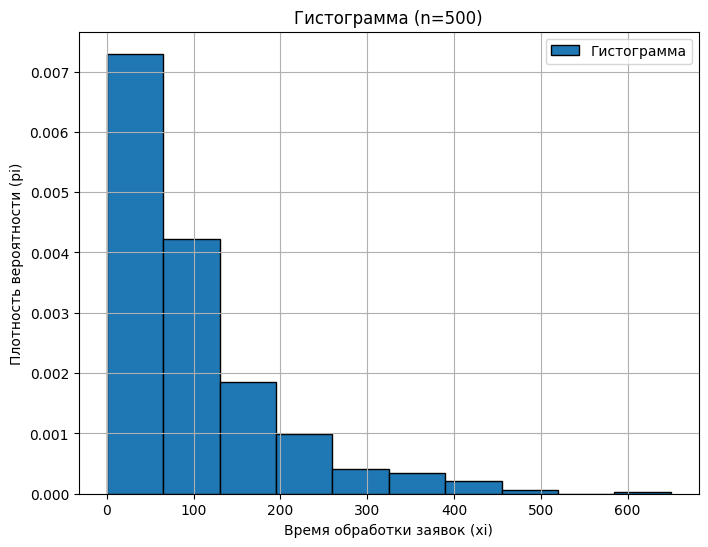

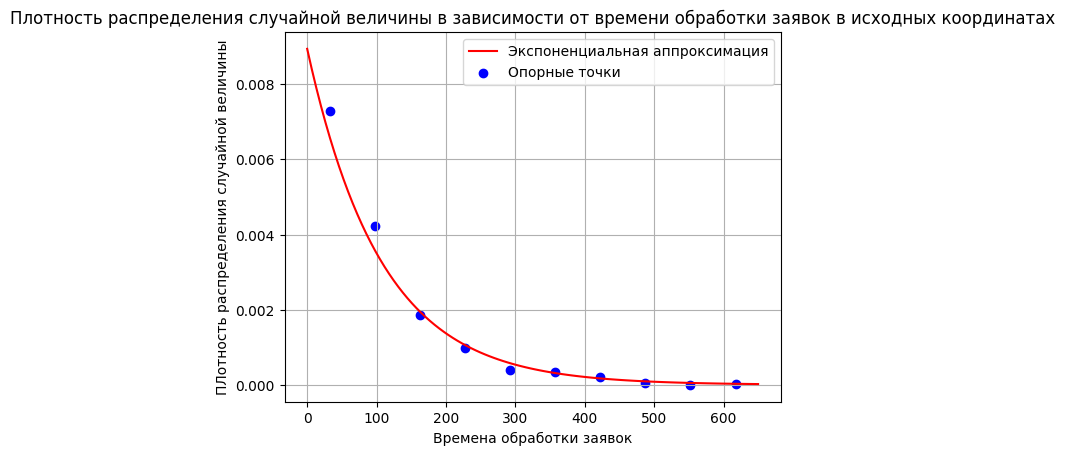

Погрешность коэффициента интенсивности: 6.19%

--- Выполнение заданий для n = 1000 ---
Опорные точки (центры интервалов и плотности):
x: 31.08, y: 0.00751
x: 93.23, y: 0.00404
x: 155.37, y: 0.00217
x: 217.52, y: 0.00113
x: 279.66, y: 0.00050
x: 341.81, y: 0.00029
x: 403.95, y: 0.00023
x: 466.10, y: 0.00018
x: 528.24, y: 0.00002
x: 590.39, y: 0.00003
Коэффициенты линейной регрессии: b0 = -4.54715, b1 = -0.01030


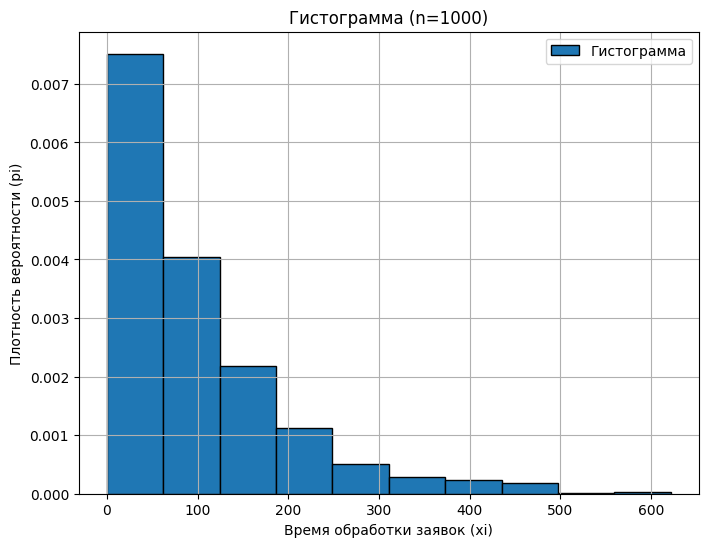

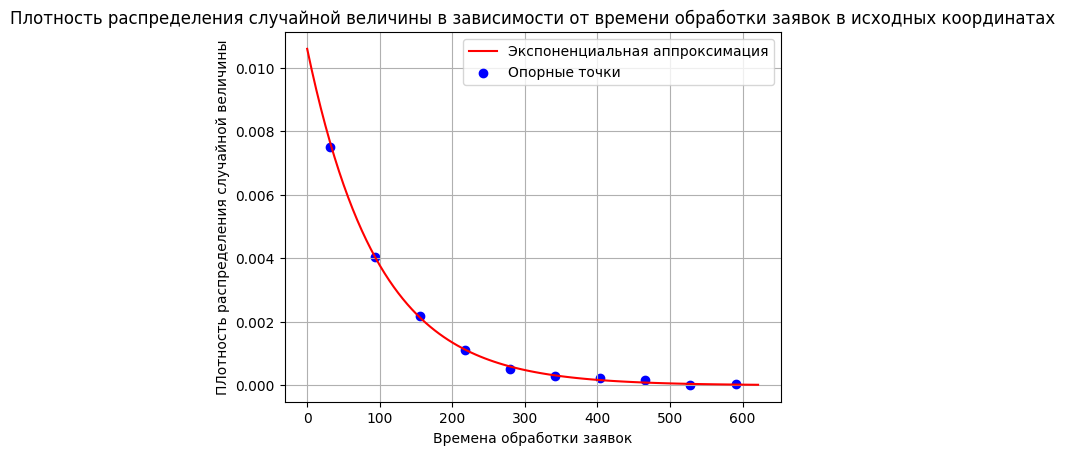

Погрешность коэффициента интенсивности: 3.05%


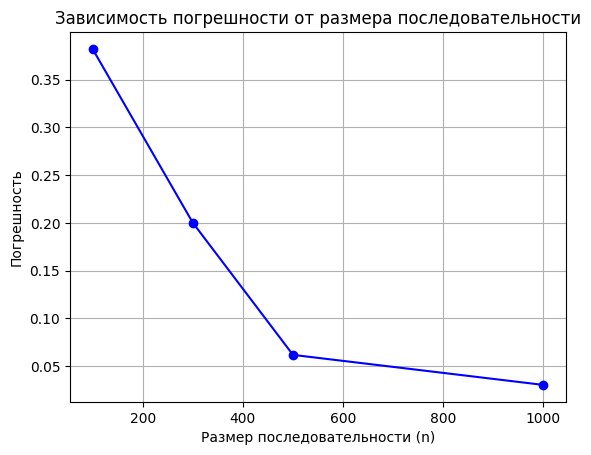

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Функция для генерации экспоненциально распределенных чисел
def generate_exponential_data(n, lambda_val):

    return -np.log(1 - np.random.uniform(0, 1, n)) / lambda_val


# Функция для вычисления коэффициентов линейной регрессии b0 и b1
def calculate_regression_coefficients(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xy = np.sum(x * y)
    sum_x2 = np.sum(x**2)

    b1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    b0 = (sum_y - b1 * sum_x) / n
    return b0, b1


# Функция для построения гистограммы и получения опорных точек
def get_histogram_data(data, bins=10):
    hist, edges = np.histogram(data, bins=bins, density=True)
    centers = (edges[:-1] + edges[1:]) / 2  # Центры интервалов
    return centers, hist


# Функция для построения экспоненциальной аппроксимации
def plot_exponential_approximation(t, A, b1):
    f_t = A * np.exp(-b1 * t)
    plt.plot(t, f_t, label="Экспоненциальная аппроксимация", color="red")


# Основная функция для выполнения всех заданий
def main():
    lambda_val = 0.01  # Интенсивность
    n_values = [100, 300, 500, 1000]  # Размеры последовательности для заданий №6 и №7
    errors = []  # Список для хранения погрешностей

    for n in n_values:
        print(f"\n--- Выполнение заданий для n = {n} ---")

        # Задание №1: Генерация данных
        data = generate_exponential_data(n, lambda_val)

        # Задание №2: Построение гистограммы
        centers, densities = get_histogram_data(data, bins=10)
        plt.figure(figsize=(8, 6))
        plt.bar(
            centers,
            densities,
            width=centers[1] - centers[0],
            
            edgecolor="black",
            
            label="Гистограмма",
        )

        # Задание №3: Получение координат опорных точек
        print("Опорные точки (центры интервалов и плотности):")
        for center, density in zip(centers, densities):
            print(f"x: {center:.2f}, y: {density:.5f}")

        # Задание №4: Вычисление коэффициентов линейной регрессии
        x = centers
        y = []
        for i in range(len(densities)):
           
            try:
                y.append(math.log(densities[i]))
            except:
                # y.append(0)
                y.append(min(y))

        # y = np.log(densities)  # Переход к логарифмам для линейной регрессии
        b0, b1 = calculate_regression_coefficients(x, y)
        print(f"Коэффициенты линейной регрессии: b0 = {b0:.5f}, b1 = {b1:.5f}")

       

        # Задание №5: Построение графика плотности
        plt.xlabel("Время обработки заявок (xi)")
        plt.ylabel("Плотность вероятности (pi)")
        plt.title(f"Гистограмма (n={n})")
        plt.legend()
        plt.grid()
        plt.show()

         # Экспоненциальная аппроксимация
        A = np.exp(b0)
        t = np.linspace(0, max(data), 100)
        plot_exponential_approximation(t, A, -b1)
        plt.scatter(centers, densities, color="blue", label="Опорные точки")
        plt.xlabel("Времена обработки заявок")
        plt.ylabel("ПЛотность распределения случайной величины")
        plt.grid()
        plt.legend()
        plt.title("Плотность распределения случайной величины в зависимости от времени обработки заявок в исходных координатах")
        plt.show()

        # Задание №6: Погрешность
        theoretical_lambda = lambda_val
        calculated_lambda = -b1
        error = abs(theoretical_lambda - calculated_lambda) / theoretical_lambda
        errors.append(error)
        print(f"Погрешность коэффициента интенсивности: {error:.2%}")

    # Задание №7: График зависимости погрешности от размера последовательности
    # plt.figure(figsize=(8, 6))
    plt.plot(n_values, errors, marker="o", linestyle="-", color="blue")
    plt.xlabel("Размер последовательности (n)")
    plt.ylabel("Погрешность")
    plt.title("Зависимость погрешности от размера последовательности")
    plt.grid()
    plt.show()


if __name__ == "__main__":
    main()
